In [39]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from spafe.features.lfcc import lfcc
from spafe.features.lpc import lpc, lpcc
import librosa 
from spafe.features.rplp import rplp,plp
from scipy.io import wavfile
import librosa.display
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
import statistics as st

In [40]:
def LFCC(audio_path):
    num_ceps = 13
    low_freq = 0
    high_freq = 2000
    nfilts = 24
    nfft = 512
    dct_type = 2,
    use_energy = False,
    lifter = 5
    normalize = False
    fs, sig = wavfile.read(audio_path)
    lfccs = lfcc(sig=sig,
             fs=fs,
             num_ceps=num_ceps,
             nfilts=nfilts,
             nfft=nfft,
             low_freq=low_freq,
             high_freq=high_freq,
             
             use_energy=use_energy,
             lifter=lifter,
             normalize=normalize)
    librosa.display.specshow(lfccs)
    plt.savefig("LFCC.png")         
            

In [41]:
def MFCC(audio_path):
    signal,sr=librosa.load(audio_path)
    mfcc=librosa.feature.mfcc(signal,n_mfcc=20,sr=sr)
    librosa.display.specshow(mfcc)
    plt.savefig("MFCC.png")


In [42]:
def LPC(audio_path):
    num_ceps = 13
    lifter = 0
    normalize = True
    fs, sig = wavfile.read(audio_path)
    lpcs = lpc(sig=sig, fs=fs, num_ceps=num_ceps)
    librosa.display.specshow(lpcs)
    plt.savefig("LPC.png")

In [43]:
def RPLP(audio_path):
    num_ceps = 13
    fs, sig = wavfile.read(audio_path)
    plps = plp(sig, fs, num_ceps)
    rplps = rplp(sig, fs, num_ceps)
    librosa.display.specshow(rplps)
    plt.savefig("RPLP.png")

In [44]:
def featureGenerator(audio_path):
    audioPath=audio_path
    feature=[]
    resized_feature=[]
    try:
        LFCC(audioPath)
        lfcc_image=cv2.imread("LFCC.png")
        feature.append(lfcc_image)
        os.remove("LFCC.png")
    except:
        pass
    try:
        MFCC(audioPath)
        mfcc_image=cv2.imread("MFCC.png")
        feature.append(mfcc_image)
        os.remove("MFCC.png")
    except:
        pass
    try:
        LPC(audioPath)
        lpc_image=cv2.imread("LPC.png")
        feature.append(lpc_image)
        os.remove("LPC.png")
    except:
        pass
    try:
        RPLP(audioPath)
        rplp_image=cv2.imread("RPLP.png")
        feature.append(rplp_image)
        os.remove("RPLP.png")
    except:
        pass        
    for image in feature:
        new_image=cv2.resize(image,(250,250))
        new_image=np.array(new_image).reshape(-1,250,250,3)
        resized_feature.append(new_image)
    return resized_feature

In [51]:
fet=featureGenerator("C:\\Users\\Riddhick\\Desktop\\Paper\\Dataset\\Person 1\\6.wwav")


IndexError: list index out of range

In [57]:
def finalModel(feature_list):
    model1=load_model("C:\\Users\\Riddhick\\Desktop\\Paper\\Models\\CNNMFCC.h5")
    model2=load_model("C:\\Users\\Riddhick\\Desktop\\Paper\\Models\\CNNLFCC.h5")
    model3=load_model("C:\\Users\\Riddhick\\Desktop\\Paper\\Models\\CNNLPC.h5")
    model4=load_model("C:\\Users\\Riddhick\\Desktop\\Paper\\Models\\CNNRPLP.h5")
    model1_prediction=model1.predict(feature_list[1])
    model2_prediction=model2.predict(feature_list[0])
    model3_prediction=model3.predict(feature_list[2])
    model4_prediction=model4.predict(feature_list[3])
    model1_prediction=np.argmax(model1_prediction,axis=1)
    model2_prediction=np.argmax(model2_prediction,axis=1)
    model3_prediction=np.argmax(model3_prediction,axis=1)
    model4_prediction=np.argmax(model4_prediction,axis=1)
    cluster=[]
    cluster.append(model1_prediction)
    mode=st.mode(cluster)
    return mode



In [58]:
def Prediction():
    feature_list=featureGenerator("C:\\Users\\Riddhick\\Desktop\\Paper\\Dataset\\Person 1\\6.wav")
    pred=finalModel(feature_list)
    print(pred)

TypeError: _append_dispatcher() takes from 2 to 3 positional arguments but 4 were given

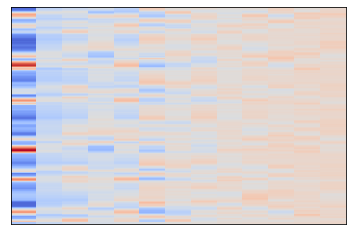

In [59]:
Prediction()